In [105]:
%load_ext autoreload
%autoreload 2
import timeit
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 120
import sys; sys.path.append('../')
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from tqdm import tqdm_notebook, tqdm
from src.utils.graphs import get_keypoints, relative_neighborhood, random_graph
from src.utils.visualize import plot_voronoi
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from math import sqrt
import numpy as np
import cv2 as cv2
from scipy.stats import entropy
from shapely.geometry import Polygon, Point

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
N_FEATURES_LIMIT = None 
test_img_path = r"../test_images/test_img_3.jpg"
train_set = r"../data/Ki67/SHIDC-B-Ki-67/Train"

In [107]:
img_arr = cv2.imread(test_img_path)

empty 447
[]
[]


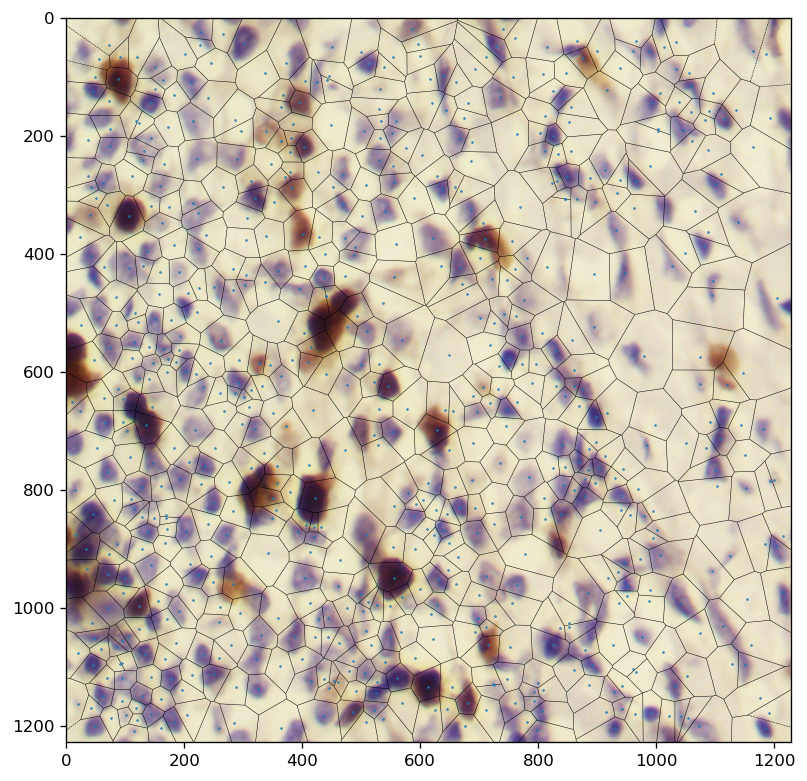

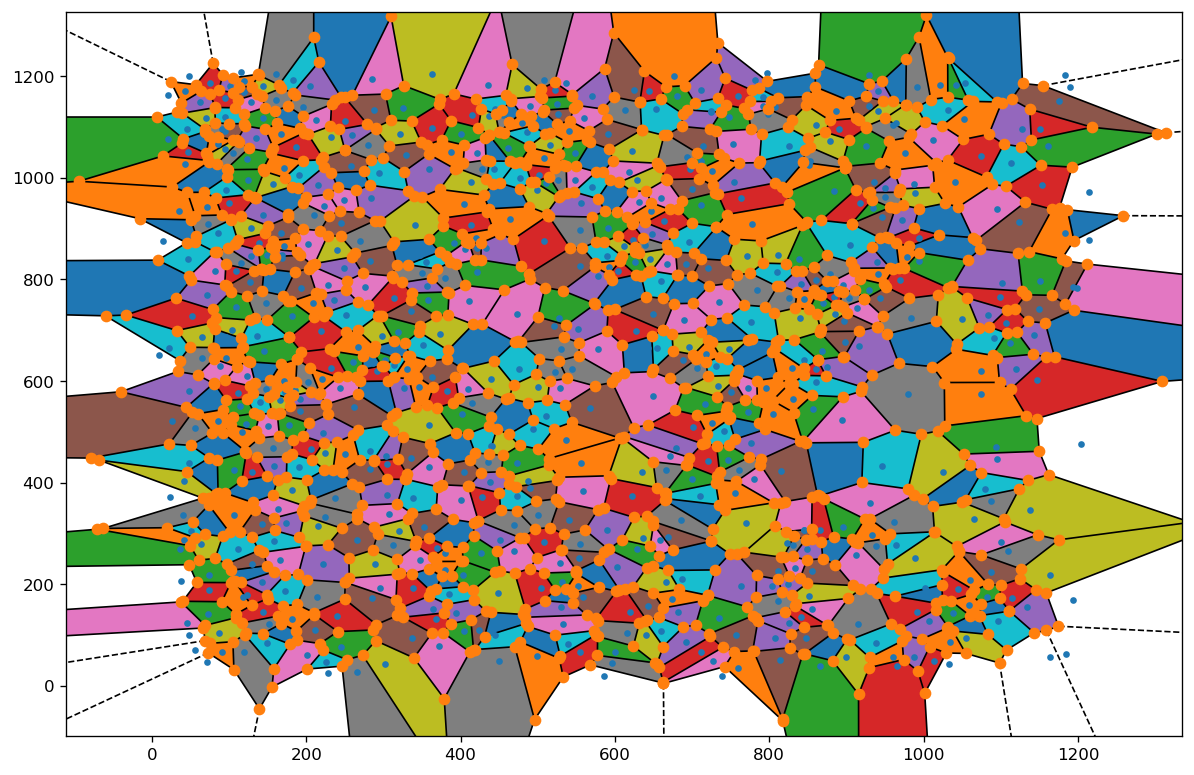

In [154]:
img_arr = plt.imread(test_img_path)
keys = list(get_keypoints(img_arr,N_FEATURES_LIMIT,True))
pixels = [key[1] for key in keys]
keys = [key[0] for key in keys]
assert len(keys)==len(pixels)
vor = Voronoi(keys)
plot_voronoi(vor,img_arr,show_points=True,show_verticles=False,line_width=0.3)


# plot
voronoi_plot_2d(vor)

# colorize
polygons = []
for idx ,region in enumerate(vor.regions):
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        x = Polygon(polygon)
        if x.is_empty:
            print('empty',idx)
            print(polygon)
            print(region)
            continue
        plt.fill(*zip(*polygon))
        polygons.append(Polygon(polygon))
plt.show()

In [110]:
keys

[(9.428677558898926, 651.45556640625),
 (14.304535865783691, 876.1279907226562),
 (14.896924018859863, 800.099365234375),
 (20.7513484954834, 1076.2520751953125),
 (20.799196243286133, 1163.339599609375),
 (22.701419830322266, 665.946044921875),
 (23.54719352722168, 372.36383056640625),
 (25.92242431640625, 521.01904296875),
 (33.80537414550781, 901.0252075195312),
 (34.90029525756836, 935.0673217773438),
 (36.44637680053711, 269.30828857421875),
 (37.697078704833984, 207.0616455078125),
 (40.66746520996094, 335.3651123046875),
 (41.230751037597656, 404.1244201660156),
 (41.460060119628906, 287.8699035644531),
 (42.83393859863281, 1170.525390625),
 (43.487937927246094, 1026.5496826171875),
 (45.82905578613281, 1096.373046875),
 (46.01202392578125, 124.11592864990234),
 (46.14670944213867, 841.0880126953125),
 (47.100528717041016, 1050.5701904296875),
 (47.708534240722656, 580.8598022460938),
 (48.06275939941406, 100.06916046142578),
 (48.26325225830078, 439.5360107421875),
 (48.5135078

In [111]:
def plot_arr(img_arr):
    fig, ax = plt.subplots()
    ax.imshow(img_arr)
    return fig

In [174]:
def get_pixels_fast(img_array,polygon):
    pixels = []
   
    (miny, minx, maxy, maxx)=[int(item) for item in list(polygon.bounds)]
    #print(polygon.bounds)
    shape = img_arr.shape
    #print(shape)
    x_range = range(minx,maxx)
    y_range = range(miny,maxy)
    clone = np.copy(img_arr)

    for x in x_range:
        for y in y_range:
            p = Point(y,x)
            if polygon.contains(p):
                pixels.append(clone[x,y])
                #clone[x,y]=[0,255,0]
    #plot_arr(clone)
    pixels = np.array(pixels)
    gray = np.dot(pixels[...,:3], [0.2989, 0.5870, 0.1140])
    return gray


In [156]:
def count_entropy(pixels):
    value,counts = np.unique(pixels, return_counts=True)
    entropy_value = entropy(counts)
    return entropy_value

In [157]:
def find_key(polygon,keys,pixels):
    inside = []
    pixel_color = []
    for idx, key in enumerate(keys):
        p = Point(key[0],key[1])
        if polygon.contains(p):
            inside.append(key)
            #print(idx)
            #print(len(keys),len(pixels))
            pixel_color.append(pixels[idx])
    #print(inside)
    return inside, pixel_color

In [158]:
def filter_polygons(polygon,img_shape):
    x = img_shape[0]
    y = img_shape[1]
    (miny, minx, maxy, maxx)=[int(item) for item in list(polygon.bounds)]
    if minx <= -1 or maxx > x:
        return False
    if miny <= -1 or maxy > y:
        return False
    return True

In [159]:
entropy_list = []
keys_list = []
pixel_list = []

In [160]:
len(polygons)

672

In [161]:
polygons = [polygon for polygon in polygons if filter_polygons(polygon,img_arr.shape)]

In [162]:
len(polygons)

617

In [163]:
filter_polygons(polygons[0],img_arr.shape)

True

In [164]:
get_pixels_fast(img_arr,polygons[0])

array([214.1839, 215.8247, 214.8248, 217.0526, 216.8785, 215.8247,
       216.0527, 214.8787, 214.8895, 216.8246, 216.0527, 213.8788,
       214.1176, 211.8898, 219.2651, 217.2653, 215.9064, 212.1348,
       213.7648, 213.1069, 211.3243, 218.2652, 216.2654, 213.9066,
       213.1347, 212.7649, 214.8078, 210.3244, 209.1827, 216.6675,
       215.6676, 213.6678, 215.1237, 217.0526, 212.808 , 214.324 ,
       207.1829, 206.9872, 216.9556, 216.8416, 215.8417, 215.9557,
       218.1835, 216.0527, 216.8677, 211.3243, 212.9543, 204.8842,
       200.9878, 217.1297, 217.1297, 217.1297, 217.2437, 216.8847,
       218.1126, 213.868 , 217.0957, 209.9546, 210.1826, 199.9987,
       196.999 , 217.1297, 217.1189, 217.1189, 215.646 , 216.6459,
       216.1128, 218.3406, 212.8681, 215.3239, 207.9656, 205.1939,
       200.1836, 193.2058, 218.2436, 217.2437, 216.6459, 215.646 ,
       215.646 , 216.6459, 217.8846, 216.8246, 218.0525, 213.167 ,
       211.8081, 206.0367, 205.2648, 195.1625, 192.836 , 218.1

In [166]:
for polygon in tqdm(polygons):
    entropy_list.append(count_entropy(get_pixels_fast(img_arr,polygon)))
    key, pixel = find_key(polygon,vor._points,pixels)
    keys_list.append(key)
    pixel_list.append(pixel)

100%|████████████████████████████████████████████████████████████████████████████████| 617/617 [03:17<00:00,  3.12it/s]


In [167]:
COLORS  = ( (185, 122, 87),  #brown
            (255, 255, 255), #white
            (153, 217, 234)) #light blue

def closest_color(pixel):
    pixel_rgb = pixel[0]
    r, g, b = pixel_rgb
    color_diffs = []
    for color in COLORS:
        cr, cg, cb = color
        color_diff = sqrt(abs(r - cr)**2 + abs(g - cg)**2 + abs(b - cb)**2)
        color_diffs.append((color_diff, color))
    min_color = min(color_diffs)[1]
    color = {
        0 : 'brown',
        1 :'white',
        2 :'blue'
    }
   # print(min_color)
    pixel_color = COLORS.index(min_color)
    return color[pixel_color]

In [168]:
pixel_colors = [closest_color(pixel) for pixel in pixel_list]

In [169]:
pixel_colors

['blue',
 'white',
 'brown',
 'brown',
 'blue',
 'white',
 'blue',
 'brown',
 'white',
 'blue',
 'brown',
 'blue',
 'blue',
 'white',
 'white',
 'white',
 'white',
 'blue',
 'white',
 'white',
 'blue',
 'white',
 'blue',
 'white',
 'brown',
 'brown',
 'blue',
 'white',
 'blue',
 'brown',
 'white',
 'blue',
 'brown',
 'blue',
 'blue',
 'white',
 'white',
 'white',
 'white',
 'blue',
 'white',
 'white',
 'blue',
 'white',
 'white',
 'blue',
 'blue',
 'blue',
 'white',
 'white',
 'brown',
 'brown',
 'brown',
 'white',
 'blue',
 'white',
 'brown',
 'blue',
 'brown',
 'white',
 'blue',
 'white',
 'blue',
 'white',
 'blue',
 'white',
 'white',
 'blue',
 'blue',
 'blue',
 'white',
 'white',
 'brown',
 'blue',
 'brown',
 'white',
 'white',
 'white',
 'white',
 'white',
 'white',
 'brown',
 'white',
 'brown',
 'brown',
 'brown',
 'blue',
 'brown',
 'blue',
 'brown',
 'brown',
 'brown',
 'white',
 'white',
 'white',
 'blue',
 'blue',
 'brown',
 'white',
 'brown',
 'white',
 'blue',
 'white',
 'b

In [170]:
import pandas as pd
dic = {
    'key':keys_list,
    'color':pixel_colors,
    'entropy':entropy_list,
}
df = pd.DataFrame(dic)
df.head(10)

key  color   entropy
0       [[42.83393859863281, 1170.525390625]]   blue  6.186648
1     [[1150.34423828125, 1096.180419921875]]  white  6.959408
2     [[1142.720458984375, 690.198486328125]]  brown  6.180035
3   [[1149.6756591796875, 741.5668334960938]]  brown  5.822888
4     [[1095.44287109375, 446.6122741699219]]   blue  6.621825
5  [[1086.9259033203125, 363.97918701171875]]  white  6.345827
6   [[1079.9168701171875, 386.5968322753906]]   blue  7.107853
7     [[1049.14990234375, 398.4041748046875]]  brown  6.000447
8    [[1074.374267578125, 574.3714599609375]]  white  7.435203
9  [[1094.1097412109375, 470.67999267578125]]   blue  6.849128

In [171]:
import plotly.express as px
fig = px.histogram(df, x="entropy", title="Histogram entropii dla pojedyńczego zdjęcia")
fig.show()
fig = px.histogram(df, x="entropy",color='color', title="Histogram entropi dla pojedyńczego zdjęcia w zależności od koloru piksela punktu kluczowego")
fig.show()


In [172]:
def experiment(limit=100):
    PATH = r"../data/Ki67/SHIDC-B-Ki-67/Train"
    all_files_df = pd.DataFrame()
    files_it = 0
    for root, dirs, files in os.walk(PATH):
        for file in tqdm_notebook(files,position=0, leave=True):
            if file.split('.')[1] == 'jpg':
                if files_it == limit:
                    all_files_df.to_csv('experiment.csv', index=False)  
                    return all_files_df
                filepath = os.path.join(root,file)
                img_arr = plt.imread(test_img_path)
                keys = list(get_keypoints(img_arr,N_FEATURES_LIMIT,True))
                pixels = [key[1] for key in keys]
                keys = [key[0] for key in keys]
                assert len(keys)==len(pixels)
                vor = Voronoi(keys)
                entropy_list = []
                keys_list = []
                pixel_list = []
                for polygon in polygons:
                    entropy_list.append(count_entropy(get_pixels_fast(polygon,img_arr)))
                    key, pixel = find_key(polygon,vor._points,pixels)
                    keys_list.append(key)
                    pixel_list.append(pixel)
                    pixel_colors = [closest_color(pixel) for pixel in pixel_list]
                dic = {
                    'key':keys_list,
                    'color':pixel_colors,
                    'entropy':entropy_list,
                }
                df = pd.DataFrame(dic)
                all_files_df=all_files_df.append(df,ignore_index = True)
                files_it+=1
                
        if file_it >= FILES_LIMIT:
            break

In [173]:
df = experiment(10)

<ipython-input-172-608f664fc165>:6: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



AttributeError: 'numpy.ndarray' object has no attribute 'bounds'

In [21]:
df

key  color   entropy
0     [[1180.2052001953125, 696.9932250976562]]   blue  8.024161
1      [[14.287022590637207, 876.140380859375]]  white  5.632229
2      [[42.8334846496582, 1170.5238037109375]]   blue  6.306780
3     [[1142.7135009765625, 690.1985473632812]]  brown  7.453311
4     [[1149.6802978515625, 741.5813598632812]]  brown  7.530594
...                                         ...    ...       ...
6705  [[444.5804443359375, 1135.2742919921875]]  white  5.097121
6706    [[437.11083984375, 1121.2010498046875]]  white  6.130155
6707     [[459.793701171875, 1125.64697265625]]  white  4.573447
6708   [[479.9812927246094, 1107.662353515625]]  white  5.597760
6709  [[461.9686279296875, 1058.8272705078125]]  white  5.929307

[6710 rows x 3 columns]

In [25]:
fig = px.histogram(df, x="entropy", title="Histogram entropii - 10 zdjęć ")
fig.show()
fig = px.histogram(df, x="entropy",color='color', title="Histogram entropi w zależności od koloru piksela punktu kluczowego - 10 zdjęć")
fig.show()

In [26]:
all_files_df_grp = df.groupby(by=['color'],as_index=False).count()
print(df.head(10))
fig = px.bar(all_files_df_grp, x="color",y="key",color='color',title="liczebność punktów kluczowych 10 zdjęć w zależności od koloru")
fig.show()


                                          key  color   entropy
0   [[1180.2052001953125, 696.9932250976562]]   blue  8.024161
1    [[14.287022590637207, 876.140380859375]]  white  5.632229
2    [[42.8334846496582, 1170.5238037109375]]   blue  6.306780
3   [[1142.7135009765625, 690.1985473632812]]  brown  7.453311
4   [[1149.6802978515625, 741.5813598632812]]  brown  7.530594
5  [[1095.4451904296875, 446.59906005859375]]   blue  8.021984
6    [[1086.907958984375, 364.0002136230469]]  white  6.251032
7   [[1138.5296630859375, 346.2148132324219]]   blue  7.128004
8          [[1079.9140625, 386.598388671875]]   blue  7.079147
9      [[1049.146484375, 398.38397216796875]]  brown  7.290617


In [54]:
X = np.array([1,2,3,1,4,5,2,3,1])
print(entropy(X, base=2))
l = len(X)
X = X/l
#entropy(

2.954003642329855


In [55]:
X

array([0.11111111, 0.22222222, 0.33333333, 0.11111111, 0.44444444,
       0.55555556, 0.22222222, 0.33333333, 0.11111111])

In [56]:
entropy(X)

2.047559296044748

In [53]:
X=[1/2,1/2]
entropy(X)

0.6931471805599453